Packages

In [102]:
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns 

Read in data

In [31]:
data = pd.read_csv('data/creditcard.csv')

Datatypes

In [34]:
data = data.astype({'Time': 'int32','Class': 'int32'})
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Dataframe describe

In [72]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Visualisations

Missing Numbers

<AxesSubplot:>

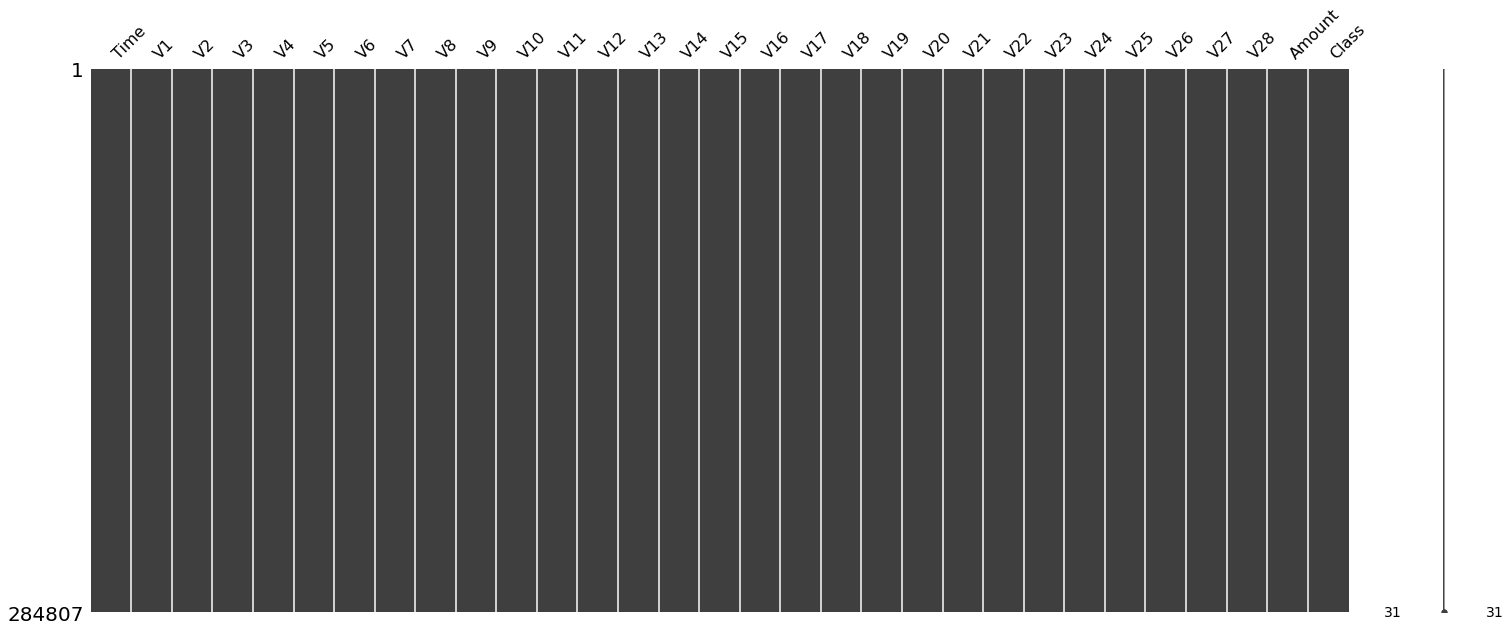

In [76]:
msno.matrix(data)

Target value distirbution

Text(0.5, 1.0, 'Target value distribution')

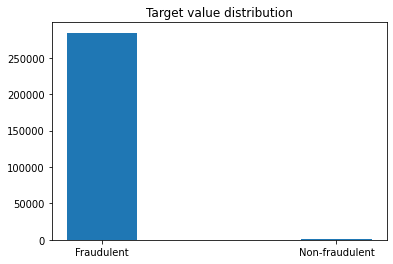

In [89]:
n_fraudlent = data['Class'].value_counts()[0]
n_non_fraudlent = data['Class'].value_counts()[1]
plt.bar(x=['Fraudulent','Non-fraudulent'],height=[n_fraudlent, n_non_fraudlent], width=0.3)
plt.title('Target value distribution')

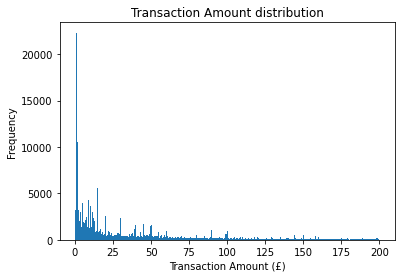

In [74]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax = ax.hist(data['Amount'], bins=500, range=(0,200))
plt.title('Transaction Amount distribution')
plt.xlabel('Transaction Amount (£)')
plt.ylabel('Frequency')
plt.show()

Correlation matrix

<AxesSubplot:>

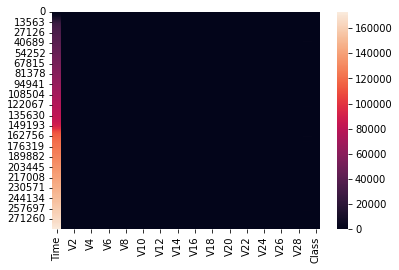

In [92]:
sns.heatmap(data)

# ML

Split into predictor/target

In [93]:
y = data['Class']
X = data.drop(columns=['Class'],axis=1)

Split into train/test

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=808)

tensorflow

In [110]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
7121/7121 [==============================] - 12s 2ms/step - loss: 1295.8142 - accuracy: 0.9982
Epoch 2/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0187 - accuracy: 0.9983
Epoch 3/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0152 - accuracy: 0.9983
Epoch 4/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0140 - accuracy: 0.9983
Epoch 5/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0134 - accuracy: 0.9983
Epoch 6/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0131 - accuracy: 0.9983
Epoch 7/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0129 - accuracy: 0.9983
Epoch 8/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0128 - accuracy: 0.9983
Epoch 9/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0127 - accuracy: 0.9983
Epoch 10/10
7121/7121 [==============================] - 11s 2ms/step 